#**Business Problem**

Analyze the data and generate insights that could help Netflix ijn deciding which type of shows/movies to produce and how they can grow the business in different countries.


 # **Column Description**

1. **Show_id**: Unique ID for every Movie / Tv Show
2. **Type**: Identifier - A Movie or TV Show
3. **Title**: Title of the Movie / Tv Show
4. **Director**: Director of the Movie
5. **Cast**: Actors involved in the movie/show
6. **Country**: Country where the movie/show was produced
7. **Date_added**: Date it was added on Netflix
8. **Release_year**: Actual Release year of the movie/show
9. **Rating**: TV Rating of the movie/show
10. **Duration**: Total Duration - in minutes or number of seasons
11. **Listed_in**: Genre
12. **Description**: The summary description


#**Defining Problem Statement and Analysing basic metrics**

# **Import Libraries**



In [ ]:
# Importing the required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Loading the Dataset

In [ ]:
# First we upload the dataset in the folder as csv file named it as "netflix.csv" and reading the data from the "netflix.csv" saved in the same folder as this colab-notebook
df = pd.read_csv("netflix.csv")

In [ ]:
# printing the dataset
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


The First Step towards solving any Business Problem through Data is Exploratory Data Analysis (EDA) and the First Step towards EDA is basis analysis of the data (number of records, number of features and their corresponding data types), locating and eliminating Missing Values, and transforming features into something which is explorable and meaningfull.

#**Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary.**

In [ ]:
# Shape of the dataset
df.shape

(8807, 12)

*Here* we see the Overall dataset contains **8807** Rows and **12** Columns

In [ ]:
# Data types of all attributes
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [ ]:
#To Get all Attributes columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
#Statistical Summary for a Continuos Variables or Before Data Cleaning:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


 # **Data Cleaning and Preprocesing**

In [ ]:
# Missing Value Detection -----> Checking the Missing Values
df.isnull().sum()
#df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64



```
# This is formatted as code
```

Here we see the info, we know that there are 8807 entries and 12 columns to work with for this EDA. There
are a few columns that contain null values in 'director', 'cast', 'country',
'date_added', 'rating', 'duration'.


In [ ]:
# Sum of null values
df.isnull().sum().sum()

4307


There are a total of 4307 null values across the entire dataset with missing values 2634 under
"director", 825 under "cast", 831 under "country", 10 under "date_added", 4 under "rating" and
3 under “duration ”. We will have to handle all null data points before we can dive into EDA and
modelling

In [ ]:
# Dropping an one Column , Here we drop show_id column because it won't help us in our analysis as it is just an unique identifier
df.drop('show_id', axis=1 , inplace=True)

In [ ]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Here, We can see the dataset that 'show_id' column is Permanently removed in the dataset.

In [ ]:
# Now check the shape of the Dataset
df.shape

(8807, 11)

Here we see the dataset contains **8807** Rows and **11** Columns. Perviously **12** columns now 'show_id' column is permanently removed.

In [ ]:
# Converting 'release_year' to 'object' because we will be using it as a Categorical Feature
df['release_year'] = df['release_year'].astype(object)

# Converting 'date_added' to 'datetime' because we will be performing yearly/monthly Analysis
df['date_added'] = pd.to_datetime(df['date_added'], infer_datetime_format=True).dt.date

In [ ]:
# Since now we have all our columns as Categorical, 'df.describe' would print Statistical Summary of the data without explicitly mentioning 'include=object'
df.describe(datetime_is_numeric=False)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,6173,7982,7976,8797,8807,8803,8804,8807,8807
unique,2,8807,4528,7692,748,1714,74,17,220,514,8775
top,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,2020-01-01,2018,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,6131,1,19,19,2818,110,1147,3207,1793,362,4


In [ ]:
# Treating the missing values
df.isna().sum()

type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Here, We see some columns having missing values so we can treat with some techniquies.
**Imputation** is a treatment method for missing value by filling it in using
certain techniques.

You can employ **mean**, **mode**, or **predictive modeling** techniques for handling **missing values**. In this case study, we will explore the utilization of Pandas' **fillna** function for **imputation**. Alternatively, you can eliminate rows with missing values by using the **dropna** function from Pandas.









In [ ]:
#Filling and droping the missing Values
df['director'].fillna("Anonymous", inplace=True)
df['cast'].fillna("Anonymous", inplace=True)
df['country'].fillna("Not Available", inplace=True)
df.dropna(subset=['date_added', 'rating', 'duration'], inplace=True)

While the easiest way to handle missing values is to delete rows containing them, this approach is not conducive to effective Exploratory Data Analysis (EDA) as it results in information loss.

*   Given that '**director**', '**cast**' and '**country**' feature a **significant number of null values**, So, we've opted to consider each missing value as indicating for '**director**' and '**cast**' as "**Anonymous**" and '**country**' as "**Not Available**".

*   However, for the labels '**date_added**', '**duration**' and '**rating**' which represent a **small number of null values** of the data, we have chosen to **remove them from the dataset**. As a result, the data frame is now **free of any missing values**.

  








In [ ]:
# Now checking the missing Values
df.isna().sum()

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Here we can see all the columns doesn't have any of null values.

In [ ]:
# Spliting and exploding in the dataset
for column_name in ['director', 'cast', 'listed_in', 'country']:
    df[column_name] = df[column_name].apply(lambda x: x.split(',') if isinstance(x, str) else x)

df = df.explode('director').explode('cast').explode('listed_in').explode('country')

for col in df.select_dtypes(object):
    df[col] = df[col].astype(str).str.strip()

df.shape

(201837, 11)

**Inference**: By splitting and exploding the dataset based on specific columns, such as "director," "cast," "listed_in," and "country," the data has been expanded, providing a more granular view. This process enables a detailed exploration of individual entries, facilitating analysis on multiple dimensions, such as diverse directors, cast members, genres, and countries associated with each entry.

In [ ]:
# Checking the duplicates
df.duplicated().sum()

79

In [ ]:
# dropping the duplicates
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

In [ ]:
#final shape of the dataset after data cleaning
df.shape

(201758, 11)

Here, we observe that after data cleaning, the overall dataset containss **201758** rows and **11** columns

In [ ]:
df.head(5)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Anonymous,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,Anonymous,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,TV Show,Blood & Water,Anonymous,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,TV Show,Blood & Water,Anonymous,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,TV Show,Blood & Water,Anonymous,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."


#**Data Analysis**

Non-Graphical Analysis: Value counts and unique attributes

In [ ]:
df['type'].value_counts()

Movie      145826
TV Show     55932
Name: type, dtype: int64

 **Inference A :** The dataset contains nearly **2.6 times** more movie titles than TV shows, indicating a preference for **movies among the audience.**

In [ ]:
df['title'].value_counts()

Kahlil Gibran's The Prophet        700
Holidays                           504
Movie 43                           468
The Eddy                           416
Narcos                             378
                                  ... 
Bill Burr: Walk Your Way Out         1
Grillo vs Grillo                     1
Katherine Ryan: In Trouble           1
Trevor Noah: Afraid of the Dark      1
Dick Johnson Is Dead                 1
Name: title, Length: 8789, dtype: int64

**Inference B :** The exploding process revealed substantial variations in row expansion within the dataset. For instance, the title "**Kahlil Gibran's The Prophet"** expanded to **700 rows**, emphasizing significant diversity in entries. In contrast, some rows remained unchanged, indicating varying impacts of the exploding operation across the dataset.

In [ ]:
df['director'].value_counts()

Anonymous              50425
Martin Scorsese          419
Youssef Chahine          409
Cathy Garcia-Molina      356
Steven Spielberg         355
                       ...  
Judah Friedlander          1
Jan-Peter Horns            1
Lucy Cohen                 1
Ali Tabrizi                1
Kirsten Johnson            1
Name: director, Length: 4992, dtype: int64

**Inference C :** **Martin Scorsese** appears most frequently in our dataset, with **419** occurrences, closely followed by **Youssef Chahine** with **409** occurrences. These directors are associated with movies or TV shows featuring extensive cast members and diverse genres.

In [ ]:
df['cast'].value_counts()

Anonymous         2149
Liam Neeson        161
Alfred Molina      160
John Krasinski     139
Salma Hayek        130
                  ... 
David Nichtern       1
Doug Lussenhop       1
Trudy Goodman        1
Damien Echols        1
Dennis Miller        1
Name: cast, Length: 36393, dtype: int64

**Inference D :** **Liam Neeson** is the most frequently occurring actor in our dataset, with **161** occurrences, closely followed by **Alfred Molina** with **160** occurrences. These actors have been featured in movies or TV shows directed by multiple directors, with extensive cast members and diverse genre affiliations.








In [ ]:
df['country'].value_counts()

United States     59238
India             22814
United Kingdom    12938
Not Available     11894
Japan              8599
                  ...  
Panama                2
Mongolia              2
Kazakhstan            1
Nicaragua             1
Uganda                1
Name: country, Length: 124, dtype: int64

**Inference E :** The highest number of entries in our dataset, totaling **59,238**, corresponds to the **United States** (US), followed by **India at 22,814**. These countries exhibit a pattern of hosting content with multiple directors, a diverse cast, and a variety of genres.














In [ ]:
df['date_added'].value_counts().head(50)

2020-01-01    3748
2019-11-01    2258
2021-07-01    2219
2017-10-01    1899
2021-09-01    1756
2018-03-01    1752
2019-12-31    1695
2019-10-01    1563
2018-10-01    1419
2021-06-02    1260
2021-08-01    1248
2021-01-01    1216
2017-09-01    1210
2018-01-01    1141
2018-11-01    1128
2021-07-06    1061
2019-01-01    1059
2017-08-01    1008
2020-04-01    1000
2019-09-01     970
2020-11-01     896
2017-07-01     888
2020-06-01     879
2020-10-01     867
2019-07-01     866
2018-04-01     847
2021-05-01     825
2020-07-05     817
2017-05-01     796
2021-04-01     792
2019-03-01     792
2019-02-01     787
2019-11-20     761
2020-09-01     753
2018-08-01     753
2018-07-01     747
2016-01-01     726
2018-12-01     715
2017-12-01     713
2021-08-27     702
2019-08-01     696
2021-06-19     685
2019-12-01     680
2017-11-01     664
2019-12-15     640
2020-10-19     628
2020-12-01     615
2021-04-16     610
2017-06-01     597
2017-03-10     593
Name: date_added, dtype: int64

 **Inference F :** The **majority** of movies are added to the platform within the **first week of each month.**








In [ ]:
df['release_year'].value_counts()

2018    24439
2019    21883
2017    20513
2020    19697
2016    18460
        ...  
1947        8
1946        6
1942        6
1943        5
1925        1
Name: release_year, Length: 74, dtype: int64

**Inference G :** Here, the audience has a preference for **newer content**.








In [ ]:
df['rating'].value_counts()

TV-MA       73811
TV-14       43879
R           25859
PG-13       16246
TV-PG       14913
PG          10919
TV-Y7        6294
TV-Y         3664
TV-G         2779
NR           1543
G            1530
NC-17         149
TV-Y7-FV       86
UR             86
Name: rating, dtype: int64

**Inference H :** The highest number of entries in our dataset, totaling **73,811**, corresponds to the **TV-MA** rating, closely followed by **TV-14** at **43,879**. These two rating types are the most preferred among the audience.








In [ ]:
df['listed_in'].value_counts()

Dramas                          29772
International Movies            28216
Comedies                        20829
International TV Shows          12815
Action & Adventure              12216
Independent Movies               9818
Children & Family Movies         9771
TV Dramas                        8933
Thrillers                        7098
Romantic Movies                  6412
TV Comedies                      4907
Crime TV Shows                   4715
Horror Movies                    4571
Kids' TV                         4555
Sci-Fi & Fantasy                 4037
Music & Musicals                 3077
Romantic TV Shows                3049
Documentaries                    2409
TV Action & Adventure            2278
Anime Series                     2273
Spanish-Language TV Shows        2118
British TV Shows                 1799
Sports Movies                    1531
Classic Movies                   1443
TV Mysteries                     1281
Korean TV Shows                  1122
Cult Movies 

**Inference I :** The highest number of entries in our dataset, totaling **29,772**, corresponds to the "**Dramas**" category, followed by "**International Movies**" at **28,216**.














# Non-Graphical Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201758 entries, 0 to 201757
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   type          201758 non-null  object
 1   title         201758 non-null  object
 2   director      201758 non-null  object
 3   cast          201758 non-null  object
 4   country       201758 non-null  object
 5   date_added    201758 non-null  object
 6   release_year  201758 non-null  object
 7   rating        201758 non-null  object
 8   duration      201758 non-null  object
 9   listed_in     201758 non-null  object
 10  description   201758 non-null  object
dtypes: object(11)
memory usage: 16.9+ MB


In [ ]:
# Statistical Summary After Data Cleaning
df.describe()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,201758,201758,201758,201758,201758,201758,201758,201758,201758,201758,201758
unique,2,8789,4992,36393,124,1713,74,14,220,42,8758
top,Movie,Kahlil Gibran's The Prophet,Anonymous,Anonymous,United States,2020-01-01,2018,TV-MA,1 Season,Dramas,A troubled young girl and her mother find sola...
freq,145826,700,50425,2149,59238,3748,24439,73811,34977,29772,700


In [ ]:
df.T.apply(lambda x: x.isnull().sum(), axis = 1)

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
# checking the unquie types
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [ ]:
#checking the number of unquie types
df['type'].nunique()

2

In [ ]:
#checking the unquie countries
df['country'].unique()

array(['United States', 'South Africa', 'Not Available', 'India', 'Ghana',
       'Burkina Faso', 'United Kingdom', 'Germany', 'Ethiopia',
       'Czech Republic', 'Mexico', 'Turkey', 'Australia', 'France',
       'Finland', 'China', 'Canada', 'Japan', 'Nigeria', 'Spain',
       'Belgium', 'South Korea', 'Singapore', 'Italy', 'Romania',
       'Argentina', 'Venezuela', 'Hong Kong', 'Russia', '', 'Ireland',
       'Nepal', 'New Zealand', 'Brazil', 'Greece', 'Jordan', 'Colombia',
       'Switzerland', 'Israel', 'Taiwan', 'Bulgaria', 'Algeria', 'Poland',
       'Saudi Arabia', 'Thailand', 'Indonesia', 'Egypt', 'Denmark',
       'Kuwait', 'Netherlands', 'Malaysia', 'Vietnam', 'Hungary',
       'Sweden', 'Lebanon', 'Syria', 'Philippines', 'Iceland',
       'United Arab Emirates', 'Norway', 'Qatar', 'Mauritius', 'Austria',
       'Cameroon', 'Palestine', 'Uruguay', 'Kenya', 'Chile', 'Luxembourg',
       'Cambodia', 'Bangladesh', 'Portugal', 'Cayman Islands', 'Senegal',
       'Serbia', 'Malt

In [ ]:
#checking the number of unquie countries
df['country'].nunique()

124

The dataset contains information from **749 unique** countries.








In [ ]:
df.duplicated().sum()

0

There is no duplicated data in this dataset.

#**Data Vizualization**


#**Visual Analysis - Univariate, Bivariate after pre-processing of the data**



**Univariate** - **Content Wise Distribution**

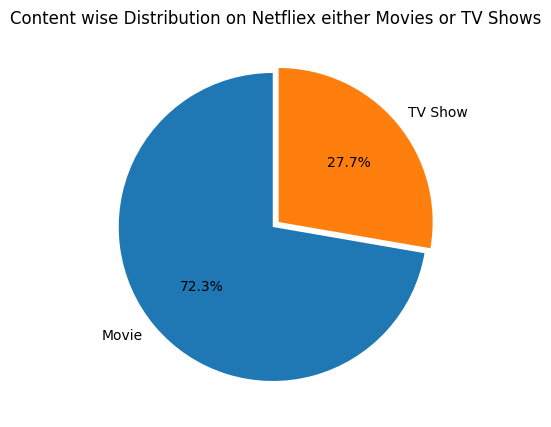

In [ ]:
plt.figure(figsize =(10,5))
plt.title("Content wise Distribution on Netfliex either Movies or TV Shows")
g = plt.pie(df.type.value_counts(), explode =(0.025,0.025),labels =df.type.value_counts().index, autopct = '%1.1f%%',startangle =90)
plt.show()


**Inference J :** Here the observation is clear and insightful. The pie chart effectively illustrates that the majority of content on Netflix is comprised of **movies**, accounting for **72.3%**, while **TV shows** represent **27.7%**. This considerable difference, with movies being **2.6 times** more prevalent than TV shows, suggests a preference among viewers for movies over TV shows on the platform.

In [ ]:
# Now again converting 'release_year' to 'int' because we will be using it as a continuous variables
df['release_year'] = df['release_year'].astype(int)

In [ ]:
# Range of an attribute
df['release_year'].min()

1925

In [ ]:
df['release_year'].max()

2021

In [ ]:
df['release_year'].unique()

array([2020, 2021, 1993, 2018, 1996, 1998, 1997, 2010, 2013, 2017, 1975,
       1978, 1983, 1987, 2012, 2001, 2014, 2002, 2003, 2004, 2011, 2008,
       2009, 2007, 2005, 2006, 1994, 2015, 2019, 2016, 1982, 1989, 1990,
       1991, 1999, 1986, 1992, 1984, 1980, 1961, 2000, 1995, 1985, 1976,
       1959, 1988, 1981, 1972, 1964, 1945, 1954, 1979, 1958, 1956, 1963,
       1970, 1973, 1925, 1974, 1960, 1966, 1971, 1962, 1969, 1977, 1967,
       1968, 1965, 1946, 1942, 1955, 1944, 1947, 1943])

In [ ]:
df['release_year'].nunique()

74

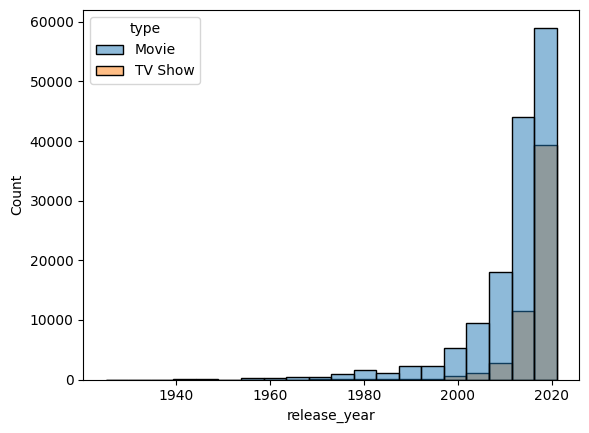

In [ ]:
sns.histplot(data = df, x ="release_year", hue ="type", bins=20)
plt.show()


**Inference K :** The historical analysis of the distribution of movies and TV shows on Netflix, as depicted in the hist plot, reveals a notable pattern. During the initial period, notably before 1980, there was a limited availability of movies and TV shows on the platform. However, a significant and consistent growth trend is observed since 1980. This surge aligns with the global increase in internet usage during that era. The rising popularity of internet access worldwide likely contributed to the expansion of content offerings on Netflix, showcasing a correlation between technological advancements and the platform's content distribution.

<Axes: xlabel='release_year', ylabel='Count'>

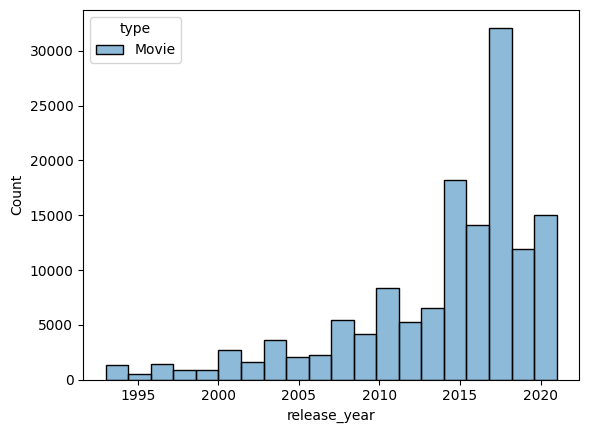

In [ ]:
movie_ih = df.loc[(df["type"] == "Movie") & (df["release_year"] > 1992)]
sns.histplot(data = movie_ih, x="release_year", hue="type", bins=20)


**Inference L :** Upon filtering for movies and focusing on releases from 1992 onwards, a discernible trend emerges in the distribution of movies on Netflix. The data indicates a gradual increase in the number of movies available on the platform over the years, reaching a peak in 2018. However, a subsequent decline is observed, suggesting a potential decrease in the distribution of movies on Netflix in the post-2018 period.

This pattern prompts further exploration into the factors influencing the observed trend, such as changes in content acquisition strategies, shifts in viewer preferences, or alterations in the overall content landscape. Analyzing these factors could provide deeper insights into the dynamics of movie distribution on Netflix during the specified period.

In [ ]:
df['duration'].unique()

array(['90 min', '2 Seasons', '1 Season', '91 min', '125 min',
       '9 Seasons', '104 min', '127 min', '4 Seasons', '67 min', '94 min',
       '5 Seasons', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '3 Seasons', '110 min', '105 min',
       '96 min', '124 min', '116 min', '98 min', '23 min', '115 min',
       '122 min', '99 min', '88 min', '100 min', '6 Seasons', '102 min',
       '93 min', '95 min', '85 min', '83 min', '113 min', '13 min',
       '182 min', '48 min', '145 min', '87 min', '92 min', '80 min',
       '117 min', '128 min', '119 min', '143 min', '114 min', '118 min',
       '108 min', '63 min', '121 min', '142 min', '154 min', '120 min',
       '82 min', '109 min', '101 min', '86 min', '229 min', '76 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '135 min',
       '136 min', '165 min', '150 min', '133 min', '70 min', '84 min',
       '140 min', '78 min', '7 Seasons', '64 min', '59 min', '139 min',
    

In [ ]:
df["date_added"]= pd.to_datetime(df["date_added"])

In [ ]:
df['date_added'].dt.month

0         9
1         9
2         9
3         9
4         9
         ..
201753    3
201754    3
201755    3
201756    3
201757    3
Name: date_added, Length: 201758, dtype: int64

In [ ]:
#Best Time to Launch a TV Show
TV_shows = df.loc[df["type"] == "TV Show"]

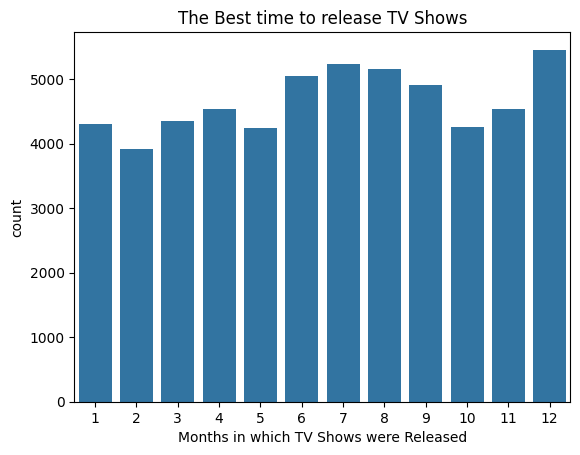

In [ ]:
sns.countplot(data = TV_shows, x = TV_shows["date_added"].dt.month)
plt.xlabel("Months in which TV Shows were Released")
plt.title("The Best time to release TV Shows")
plt.show()

**Inference M :** The optimal period for launching TV shows appears to be **December**, as a significant majority of TV shows are introduced during this month.






In [ ]:
df['date_added']

0        2021-09-25
1        2021-09-24
2        2021-09-24
3        2021-09-24
4        2021-09-24
            ...    
201753   2019-03-02
201754   2019-03-02
201755   2019-03-02
201756   2019-03-02
201757   2019-03-02
Name: date_added, Length: 201758, dtype: datetime64[ns]

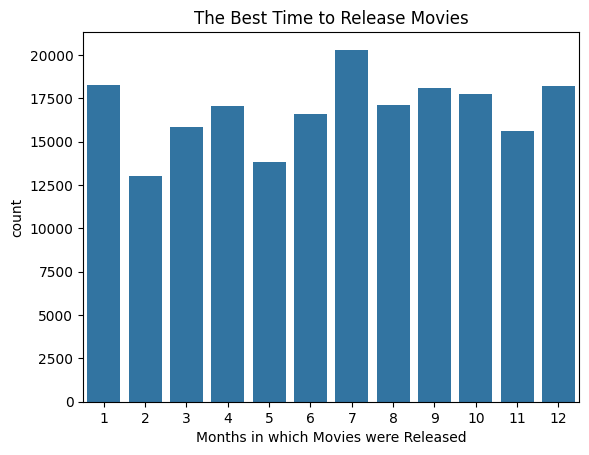

In [ ]:
# Best Time to Launch a TV Show
sns.countplot(data = df, x = df["date_added"].dt.month)
plt.xlabel("Months in which Movies were Released")
plt.title("The Best Time to Release Movies")
plt.show()

**Inference N :** The prime time for releasing movies seems to be in **July**, as a substantial majority of movie launches occur during this month.

**Pair Plot**

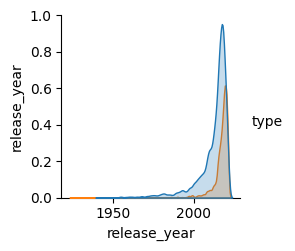

In [ ]:
# Since we have only one Numerical Category in our dataset we can do pairplot of only one category.
sns.pairplot(df,hue="type")

**Top Rating on Movies and TV Shows**

In [ ]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

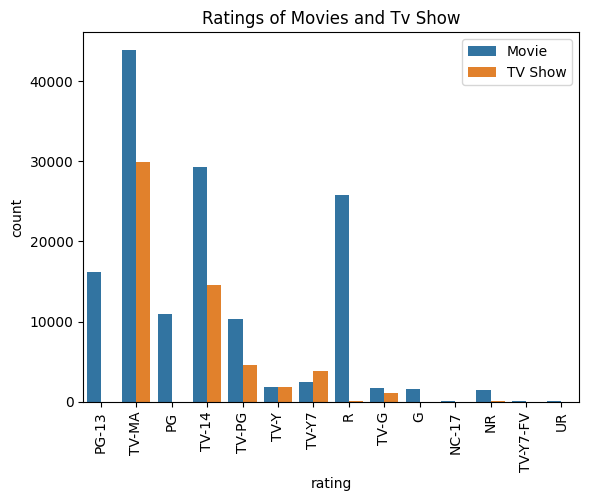

In [ ]:
plt.title("Ratings of Movies and Tv Show")
sns.countplot(data = df, x= "rating",hue="type")
plt.xticks(rotation=90)
plt.legend(loc ="upper right")
plt.show()

**Inference O :** Here, we can see the Predominant Rating for both Movies and TV shows is **TV-MA**.



**Analysing different types of Genres**


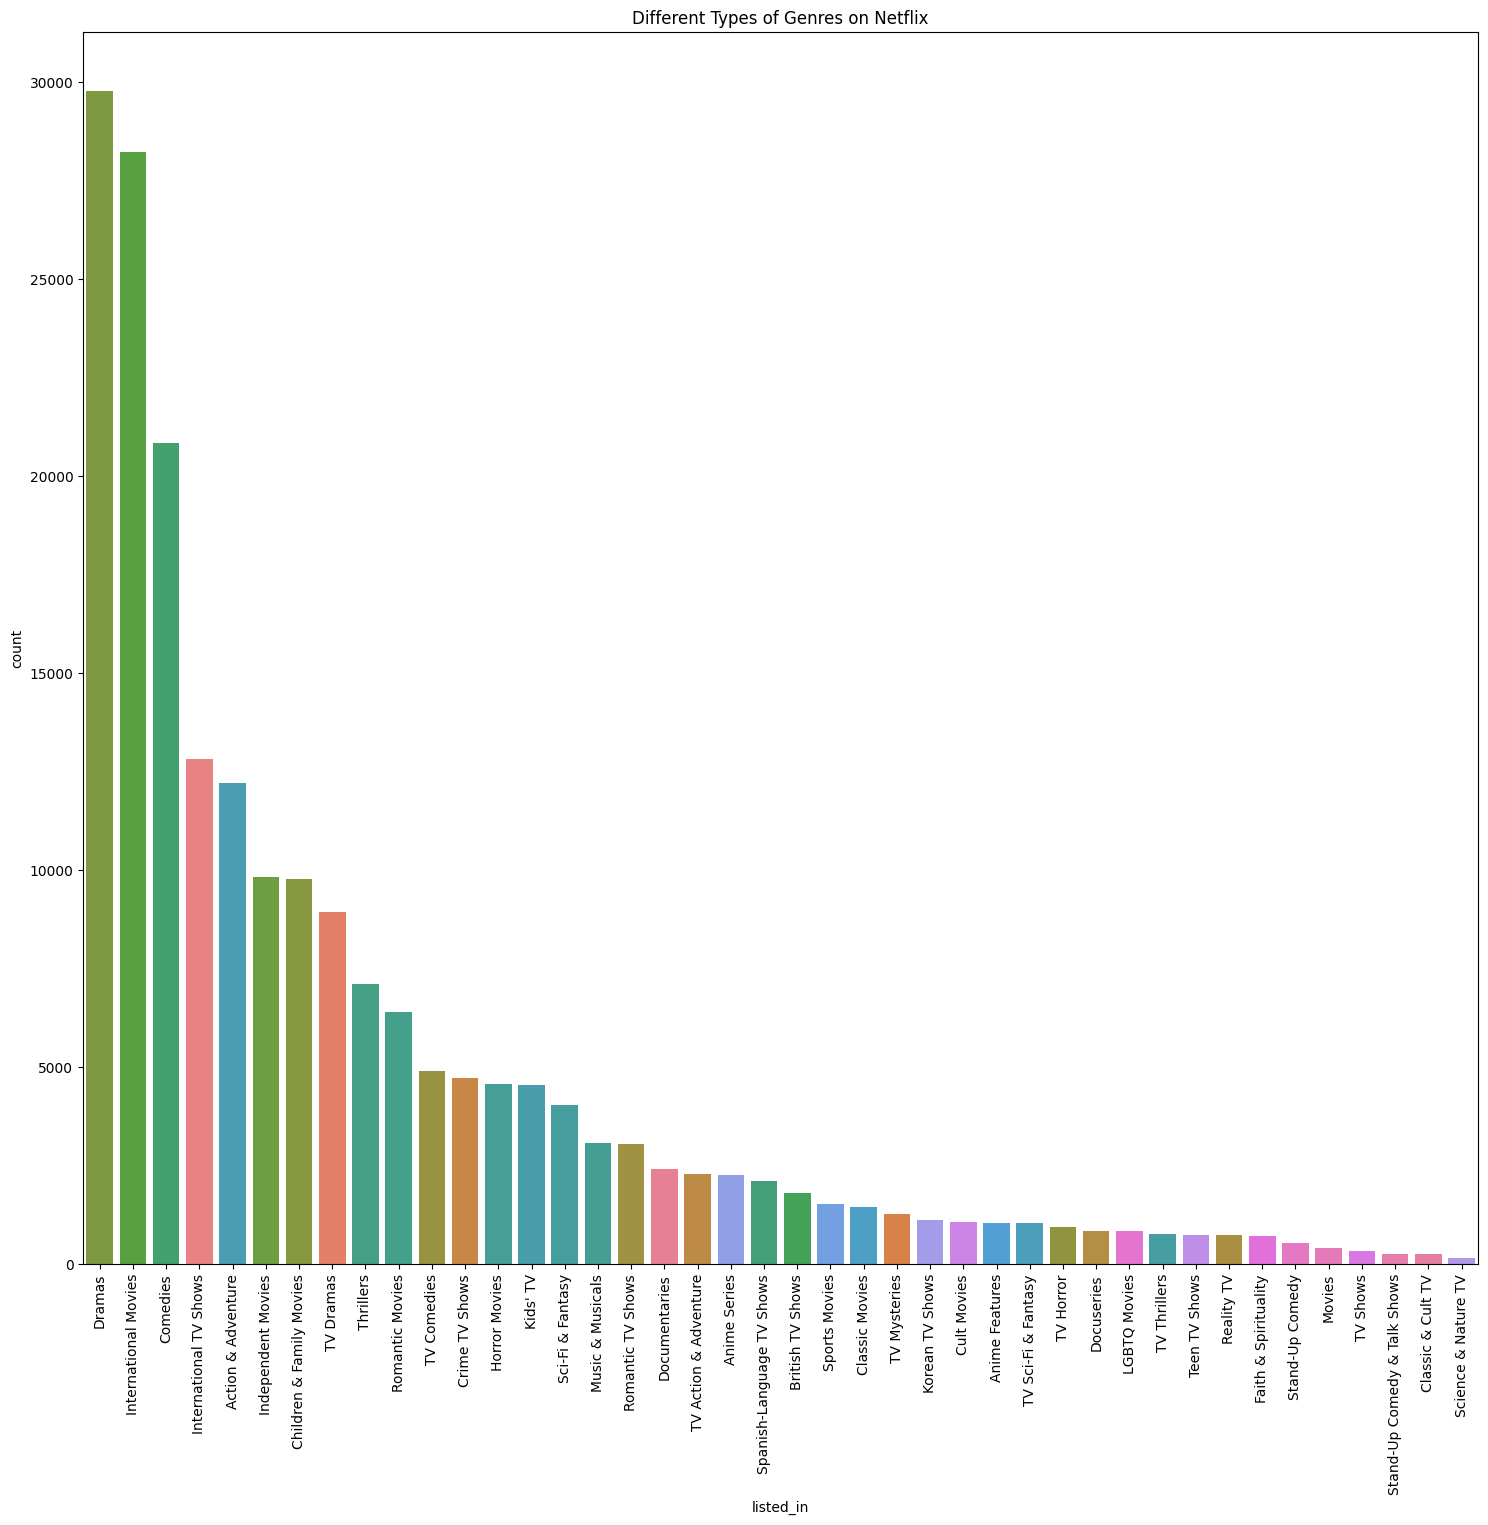

In [ ]:
plt.figure(figsize=(18,16))
plt.title("Different Types of Genres on Netflix")
sns.countplot(data = df, x = "listed_in", hue= "listed_in", order= df["listed_in"].value_counts().index)
plt.xticks(rotation=90)
plt.show()


**Inference P :** The countplot **visualization** clearly highlights the diversity of Genre types on the platform. **Dramas** emerge as the most prevalent genre, indicating a significant audience preference for this category. Following closely are **International Movies**, suggesting a broad appeal for diverse global content on the platform.

**Bivariate Analysis**

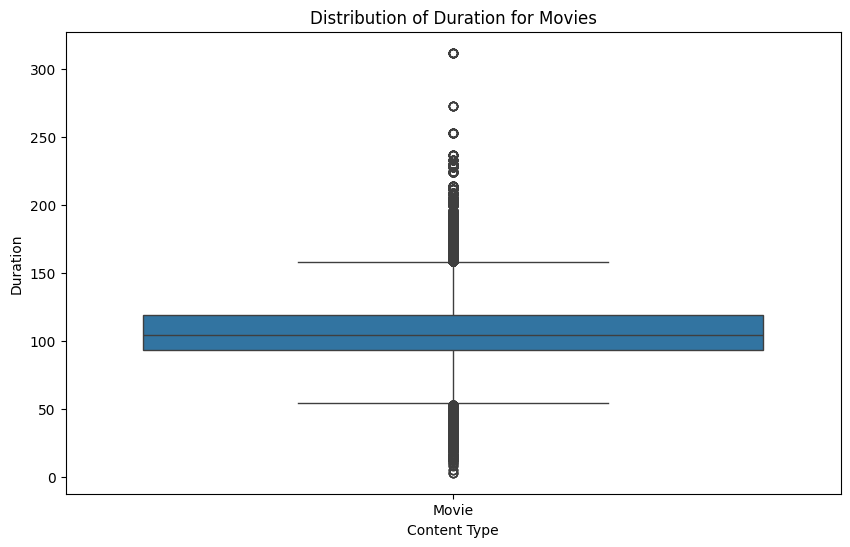

In [ ]:
# Creating a Boxplot for Movies Duration
Movies_df = df[df.type.str.contains("Movie")].copy()
Movies_df['duration'] = Movies_df['duration'].str.extract('(\d+)',
expand=False).astype(int)

plt.figure(figsize=(10, 6))
sns.boxplot(data = Movies_df, x = 'type', y = 'duration')
plt.xlabel('Content Type')
plt.ylabel('Duration')
plt.title('Distribution of Duration for Movies')
plt.show()

**Inference Q :** The boxplot analysis of movie durations reveals a median duration approximately in the range of **100 to 110 minutes**. The interquartile range, depicted by the box, suggests that a substantial portion of movies falls within this duration range. However, the presence of outliers on both the upper and lower sides indicates the existence of movies with significantly shorter or longer durations. This observation underscores the diversity in movie lengths available on the platform, catering to various audience preferences.






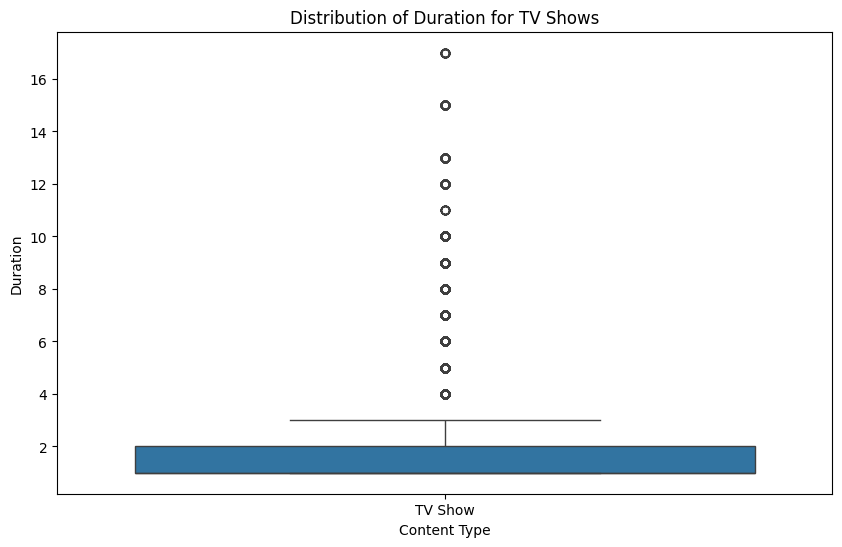

In [ ]:
# Creating a Boxplot for TV Shows Duration
TV_Show_df = df[df.type.str.contains("TV Show")].copy()
TV_Show_df['duration'] = TV_Show_df['duration'].str.extract('(\d+)',
expand=False).astype(int)

plt.figure(figsize=(10, 6))
sns.boxplot(data = TV_Show_df, x ='type', y ='duration')
plt.xlabel('Content Type')
plt.ylabel('Duration')
plt.title('Distribution of Duration for TV Shows')
plt.show()

**Inference R :** The boxplot analysis of TV show durations reveals a median duration within the range of 1 to 2 Seasons. The absence of outliers on one side suggests a more uniform distribution, indicating that TV show episodes generally fall within a consistent duration range. This pattern aligns with the typical structure of TV shows, where episodes often have a standardized duration. The absence of outliers also implies a more predictable viewing experience for TV show enthusiasts, with less variability in episode lengths compared to movies.

# **Business Insights**

**Business Insights For Non-Graphical Analysis**

As we Analysis the Dataset above from **Inference A** to
**Inference I** represents the **Business Insights for Non-Graphical Analysis.**

*   **Inference A :** The dataset contains nearly 2.6 times more
movie titles than TV shows, indicating a preference for movies among the audience.

*   **Inference B :** The exploding process revealed substantial variations in row expansion within the dataset. For instance, the title "Kahlil Gibran's The Prophet" expanded to 700 rows, emphasizing significant diversity in entries. In contrast, some rows remained unchanged, indicating
varying impacts of the exploding operation across the dataset.

*   **Inference C :** Martin Scorsese appears most frequently in our dataset, with 419 occurrences, closely followed by Youssef Chahine with 409 occurrences. These directors are associated with movies or TV shows featuring extensive cast members and diverse genres.

*   **Inference D :** Liam Neeson is the most frequently occurring actor in our dataset, with 161 occurrences, closely followed by Alfred Molina with 160 occurrences. These actors have been featured in movies or TV shows directed by multiple directors, with extensive cast members and diverse genre affiliations.

*   **Inference E :** The highest number of entries in our dataset, totaling 59,238, corresponds to the United States (US), followed by India at 22,814. These countries exhibit a pattern of hosting content with multiple directors, a diverse cast, and a variety of genres.

*  **Inference F :** The majority of movies are added to the platform within the first week of each month.

*   **Inference G :** Here, the audience has a preference for newer content.

*   **Inference H :** The highest number of entries in our dataset, totaling 73,811, corresponds to the TV-MA rating, closely followed by TV-14 at 43,879. These two rating types are the most preferred among the audience.

*   **Inference I :** The highest number of entries in our dataset, totaling 29,772, corresponds to the "Dramas" category, followed by "International Movies" at 28,216.

**Business Insights For Visual Analysis**

As we Analysis the Dataset above from **Inference J** to
**Inference R** represents the **Business Insights for Visual Analysis.**

*   **Inference J :** Here the observation is clear and insightful. The pie chart effectively illustrates that the majority of content on Netflix is comprised of movies, accounting for 72.3%, while TV shows represent 27.7%. This considerable difference, with movies being 2.6 times more prevalent than TV shows, suggests a preference among viewers for movies over TV shows on the platform.

*   **Inference K :** The historical analysis of the distribution of movies and TV shows on Netflix, as depicted in the hist plot, reveals a notable pattern. During the initial period, notably before 1980, there was a limited availability of movies and TV shows on the platform. However, a significant and consistent growth trend is observed since 1980. This surge aligns with the global increase in internet usage during that era. The rising popularity of internet access worldwide likely contributed to the expansion of content offerings on Netflix, showcasing a correlation between technological advancements and the platform's content distribution.

*   **Inference L :** Upon filtering for movies and focusing on releases from 1992 onwards, a discernible trend emerges in the distribution of movies on Netflix. The data indicates a gradual increase in the number of movies available on the platform over the years, reaching a peak in 2018. However, a subsequent decline is observed, suggesting a potential decrease in the distribution of movies on Netflix in the post-2018 period.

   This pattern prompts further exploration into the factors influencing the observed trend, such as changes in content acquisition strategies, shifts in viewer preferences, or alterations in the overall content landscape. Analyzing these factors could provide deeper insights into the dynamics of movie distribution on Netflix during the specified period.

*   **Inference M :** The optimal period for launching TV shows appears to be December, as a significant majority of TV shows are introduced during this month.

*   **Inference N :** The prime time for releasing movies seems to be in July, as a substantial majority of movie launches occur during this month.

*   **Inference O :** Here, we can see the Predominant Rating for both Movies and TV shows is TV-MA.

*   **Inference P :** The countplot visualization clearly highlights the diversity of Genre types on the platform. Dramas emerge as the most prevalent genre, indicating a significant audience preference for this category. Following closely are International Movies, suggesting a broad appeal for diverse global content on the platform.

*   **Inference Q :** The boxplot analysis of movie durations reveals a median duration approximately in the range of 100 to 110 minutes. The interquartile range, depicted by the box, suggests that a substantial portion of movies falls within this duration range. However, the presence of outliers on both the upper and lower sides indicates the existence of movies with significantly shorter or longer durations. This observation underscores the diversity in movie lengths available on the platform, catering to various audience preferences.

*   **Inference R :** The boxplot analysis of TV show durations reveals a median duration within the range of 1 to 2 Seasons. The absence of outliers on one side suggests a more uniform distribution, indicating that TV show episodes generally fall within a consistent duration range. This pattern aligns with the typical structure of TV shows, where episodes often have a standardized duration. The absence of outliers also implies a more predictable viewing experience for TV show enthusiasts, with less variability in episode lengths compared to movies.









# **Recommendations**

Recommendations to improve the business on Netfliex.

*   Netflix can introduce regional content in most popular genres (Dramas, Comedies, and Documentaries) and ratings (TV-MA, TV-14, and R) to increase its customer base in less popular regions for example Europe and Africa.

*   Netflix can produce longer movies and shows in the popular genres - Dramas, Comedies, and Documentaries - because these genres are loved by the audience and new shows will not find it hard to find people's love. This would account for recurring payments for Netflix because longer shows will span over months or years and people would have to pay to watch what they love.


*   Since most of the movies and shows on Netflix are added in the first week of the month, the Engineering Team should maintain and scale servers accordingly for this week and also for the rest of the month.

*   Since the database does not have many old movies or shows, it is worth the shot to add these contents on Netflix to see if they get any traction from the audience.

*   Add new movies and shows belonging to less popular ratings and genres to give audience more options in these unppopular areas to watch from and who know they may love the new content.

*   Netflix can introduce a weekly subscription plan that is valid only for the first week of a month. Since most of the new movies and shows are added in the first week, people signing up for this subscription will try to consume as much content as possible and this could form a habit and thus produce a loyal customer of Netflix.

*   Netflix can bring together most popular cast members and directors under one umbrella to produce shows and movies that would be popular and accepted by a very large base of audience.